In [1]:
#추가 파일 다운로드 부분
!wget https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py
%pip install torchvision
%pip install torchinfo
%pip install pytorchcv

--2024-04-19 10:58:48--  https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6540 (6.4K) [text/plain]
Saving to: ‘pytorchcv.py’

pytorchcv.py        100%[===================>]   6.39K  --.-KB/s    in 0.001s  

2024-04-19 10:58:48 (8.97 MB/s) - ‘pytorchcv.py’ saved [6540/6540]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 29.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.4/532.4 kB 13.4 MB/s eta 0:00:0000:0

100.0%


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100.0%
100.0%


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100.0%



Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [1]:
#필요한 모듈
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
from torchinfo import summary
import numpy as np
import pytorchcv

from pytorchcv import load_fashion_mnist, train, plot_results, plot_convolution, display_dataset
load_fashion_mnist(batch_size=128) 

데이터 분석:
fashionMNIST에서 6만개 데이터 셋 받아오기

In [2]:
#fashion_mnist 6만개 데이터 받아오기
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

# 학습 데이터 6만개 로드
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

받아온 데이터 셋 확인하고 데이터를 랜덤으로 시각화 진행

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


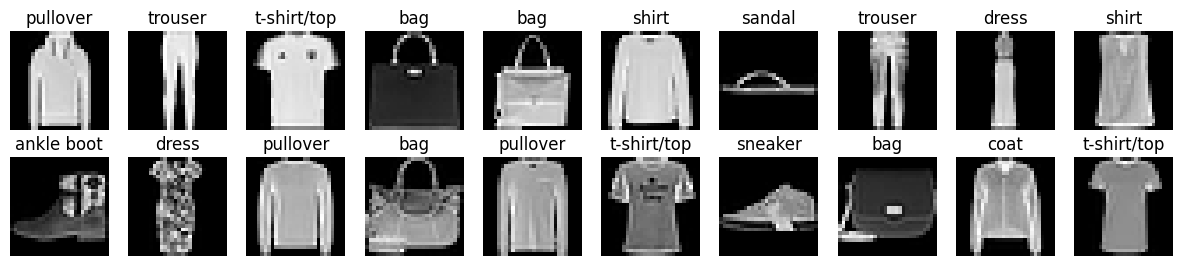

In [3]:
# 데이터 6만개 확인
print(training_data)


# 6만개 데이터 중 일부 데이터를 랜덤으로 시각화
# 데이터를 10 * 2로 보여줌
labels_map = {
    0: "t-shirt/top",
    1: "trouser",
    2: "pullover",
    3: "dress",
    4: "coat",
    5: "sandal",
    6: "shirt",
    7: "sneaker",
    8: "bag",
    9: "ankle boot",
}

#출력되는 부분 배경 크기를 가로 15인치 세로 3인치로 설정
figure = plt.figure(figsize=(15, 3)) 

# 그리드의 열과 행 수를 지정
cols, rows = 10, 2

for i in range(1, cols * rows + 1):

    # 랜덤한 인덱스를 사용하여 데이터로부터 사진 출력
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]

    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")

     # 이미지 표시
    plt.imshow(torch.permute(img, (1, 2, 0)), cmap='gray')
plt.show()

받아온 6만개의 데이터 셋을 8:2 비율로 나누고 출력하기

In [4]:
#6만개의 파일을 학습 데이터와 검증 데이터 8:2의 비율로 나누기
import torch
from torch.utils.data import random_split

# 위에서 뽑은 6만개 전체 데이터셋의 크기
dataset_size = len(training_data)

# 학습 데이터와 검증 데이터의 크기
train_size = int(0.8 * dataset_size)
val_size = dataset_size - train_size



# 데이터를 나누는 데 사용할 시드를 설정
# 이렇게 시드를 설정하게 되면 무작위로 데이터 셋을 섞을 때 항상 동일한 순서로 데이터가 섞이게 된다.
# 따라서 같은 시드인 42를 사용하게 되면 학습 데이터와 검증 데이터는 바뀌지 않고 매번 동일한 데이터를 얻게 된다.
# 즉 항상 동일한 학습 및 검증 데이터를 얻기 위해서 시드를 사용한다.
torch.manual_seed(42)

# fashion mnist에서 가져온 6만개의 데이터를 무작위로 학습 데이터와 검증 데이터로 나누기 진행
train_data, valid_data = random_split(training_data, [train_size, val_size])

# 학습 데이터와 검증 데이터의 개수 출력
print("Train data 개수:", len(train_data))
print("Valid data 개수:", len(valid_data))

# 학습 데이터와 검증 데이터의 비율 출력
print("Train data 비율:", len(train_data) / dataset_size)
print("Valid data 비율:", len(valid_data) / dataset_size)

Train data 개수: 48000
Valid data 개수: 12000
Train data 비율: 0.8
Valid data 비율: 0.2


따로 받은 1만개의 데이터 셋을 이용해 TEST 데이터 셋 만들기

원래라면 6만개의 데이터를 7 : 2 : 1 비율로 훈련, 검증, 테스트 데이터로 만들어야 하지만

6만개의 데이터 셋을 훈련 데이터, 검증 데이터로 만들고
1만개의 데이터 셋을 테스트 데이터로 만든 이유는

6만개의 데이터를 훈련 시키고 검증을 한 뒤
1만개의 데이터를 로드하고 로드한 데이터를 테스트 데이터 셋으로 활용해 보는 과정을 공부해보고 싶었기 때문입니다.

In [5]:
# 모델을 테스트 할 테스트 데이터 셋 만들기 
# 테스트 데이터 셋은 교수님께서 주신 t10k-images-idx3-ubyte.gz, t10k-labels-idx1-ubyte.gz의 압축을 풀어서 만들도록 함.
from torchvision.datasets import MNIST
from pathlib import Path
import gzip
import numpy as np

# 테스트 데이터셋의 파일 경로 설정
# 현재 1만개의 데이터 경로를 설정
data_path = Path("/workspaces/introai202401-midterm-JuhunSong")
image_file = "t10k-images-idx3-ubyte.gz"  # 이미지 파일 이름
label_file = "t10k-labels-idx1-ubyte.gz"  # 라벨 파일 이름


# np.frombuffer(): 이 함수는 버퍼에서 데이터를 읽어 NumPy 배열로 반환함. 여기서 "버퍼"는 이진 데이터를 말함.
# offset: 이 매개변수는 버퍼에서 데이터를 읽기 시작할 오프셋 즉 시작 위치를 지정
# reshape(): 이 함수는 배열의 크기를 변경, mnist는 28x28 픽셀 데이터로 저장되어 있기에 이를 다시 28x28 배열로 저장하도록 함.

# t10k-images-idx3-ubyte.gz 이미지 데이터 로드
with gzip.open(data_path / image_file, "rb") as f:
    images = np.frombuffer(f.read(), dtype=np.uint8, offset=16).reshape(-1, 28, 28)

# t10k-labels-idx1-ubyte.gz 라벨 데이터 로드
# 데이터의 경로와 파일의 이름을 읽고 
with gzip.open(data_path / label_file, "rb") as f:
    labels = np.frombuffer(f.read(), dtype=np.uint8, offset=8)


# unsqueeze(1)을 사용하면 기존 텐서에 새로운 차원을 추가할 수 있음. 그래서 채널의 차원을 추가함.
# 텐서의 데이터 타입을 실수 형으로 변환하고 0부터 255까지의 범위에 있는 이미지 데이터를 0과 1 사이의 값으로 변환하기 위해 255로 나눔.
# 왜 255냐면 = 픽셀 값이 0~255 사이에 존재하기 때문, 일반적으로 이미지 데이터는 0과 1 사이에 값으로 정규화 함.
# 이미지와 라벨을 토치 텐서로 변환
test_images = torch.tensor(images).unsqueeze(1).float() / 255.0
test_labels = torch.tensor(labels)

# 테스트 데이터셋 생성 
# 이제 완성된 모델을 테스트 하기 위한 3번째 데이터 셋인 test_data를 생성함.
test_data = list(zip(test_images, test_labels))

# 테스트 데이터셋의 개수 출력
print("테스트 데이터 개수:", len(test_data))


# 그럼 지금 만든 데이터는 총 3개로
# 1. train_data
# 2. valid_data
# 3. test_data
# 이렇게 3가지로 이제 train_data를 모델에 학습 시키고 valid_data를 통해 데이터를 검증하고 마지막으로 test_data를 통해 정확도를 측정해 볼 것임.

테스트 데이터 개수: 10000


모델 구축 및 훈련:
CNN 모델 만들기

In [6]:
# 일단 이 데이터를 학습 시키기 위한 cnn 모델 만들기를 진행할 것임.
# 아래는 cnn 모델을 정의한 코드
# cnn 모델의 풀링 레이어를 추가하고 그에 따른 특성 맵의 크기 또한 조정을 진행
# 이후 레이어에  MaxPool2d-2도 출력하도록 함.

import torch.nn as nn # 파이토치의 신경망 모듈(nn)을 임포트
%pip install torchsummary # 신경망 모델의 요약 정보를 제공하는 torchsummary 라이브러리를 설치
from torchsummary import summary # 설치된 torchsummary에서 summary 함수를 임포트


# 아래 코드에 pool 레이어를 추가함.
# 풀링 레이어는 주로 이미지 데이터의 크기를 줄이는 데 사용함, 이를 통해 계산량을 줄이고 추상화된 특징을 추출하는 데 도움을 줌.
# 하지만 풀링 레이어를 이용했기에 원래 코드에선 5184개의 특성이 하나의 차원으로 펼쳐져서 완전 연결 레이어에 입력 되었지만
# 폴링 레이어를 추가해 특성 맵의 크기가 줄어들면서 평탄화된 특성의 수도 줄어들게 되었기에 특성 맵의 크기를 조정하려고 함.
# 결국 풀링 레이어를 거친 후 특성 맵의 크기를 9*12*12로 수정하고 10개의 출력 특성으로 변화하는 완전 연결 레이어를 정의함.

class OneConv(nn.Module): # nn.Module을 상속받는 OneConv라는 새로운 클래스를 정의하는데 nn.Module은 파이토치에서 모든 신경망 모듈의 기본 클래스
    def __init__(self): # 클래스의 생성자로, OneConv 객체가 생성될 때 초기화 과정을 정의
        super(OneConv, self).__init__() # 상위 클래스인 nn.Module의 생성자를 호출하여 클래스를 적절히 초기화
        self.conv = nn.Conv2d(in_channels=1,out_channels=9,kernel_size=(5,5)) # 입력 채널이 1개, 출력 채널이 9개인 2D 컨볼루션 레이어를 정의하고, 이를 객체의 conv 속성으로 할당
        self.pool = nn.MaxPool2d(2, 2) # 2x2 pooling 레이어 설정
        self.flatten = nn.Flatten() # 다차원 입력을 1차원 배열로 변환하는 Flatten 레이어를 정의하고, flatten 속성으로 할당
        self.fc = nn.Linear(9*12*12,10) # 9*12*12개의 입력 특성을 10개의 출력 특성으로 변환하는 완전 연결 레이어(또는 선형 레이어)를 정의하고, fc 속성으로 할당

    def forward(self, x): # 모델의 순전파를 정의하는 메서드로 입력 텐서 x가 모델을 통과하는 과정을 설명
        if x.dim() == 5 and x.size(2) == 1:  # 입력 x의 차원이 예상치 못한 추가 차원을 포함하는 경우, 해당 차원을 제거
            x = x.squeeze(2)
        x = nn.functional.relu(self.conv(x)) # 정의된 컨볼루션 레이어를 입력 x에 적용한 후 ReLU 활성화 함수를 적용
        x = self.pool(x)  # 풀링 레이어를 컨볼루션 레이어와 활성화 함수 사이에 배치
        x = self.flatten(x) # ReLU의 출력을 flatten 레이어를 통해 평탄화
        x = nn.functional.log_softmax(self.fc(x),dim=1) # 평탄화된 벡터를 fc 레이어에 적용하고, 결과를 로그 소프트맥스 함수를 통해 처리하는데 이 함수는 다중 클래스 분류 문제에 대한 확률을 계산할 때 사용


        return x  # The final processed tensor x, which contains the log probabilities of the classes, is returned from the forward method. This output can be used by a loss function during training to compute the error and update the model weights

# Create an instance of the network
net = OneConv() # OneConv 클래스의 인스턴스를 생성

# Print the summary of the model
summary(net,input_size=(1,1,28,28)) # 생성된 모델 net의 요약 정보를 출력하는데 여기서 input_size는 모델이 기대하는 입력 데이터의 크기를 (채널 수, 높이, 너비) 형식으로 지정

Note: you may need to restart the kernel to use updated packages.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 9, 24, 24]             234
         MaxPool2d-2            [-1, 9, 12, 12]               0
           Flatten-3                 [-1, 1296]               0
            Linear-4                   [-1, 10]          12,970
Total params: 13,204
Trainable params: 13,204
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.06
Params size (MB): 0.05
Estimated Total Size (MB): 0.11
----------------------------------------------------------------


훈련 데이터와 테스트 데이터 말고도 검증 데이터를 만들었기 때문에 이를 사용하려고 따로 valid_loader를 만들어서 사용함.
그래서 총 train_loader, valid_loader, test_loader 3개를 이용해 모델을 학습 시키고 검증하고 테스트를 진행함.

In [7]:
# PyTorch를 사용하여 신경망 모델을 학습하고 검증하는 과정을 구현
# 위 cnn 모델에 대해서 train_data를 이용해 학습 시키는 코드

import torch # torch, torch.optim, torch.nn.functional 모듈을 임포트하는데 PyTorch에서 모델을 구성하고 최적화하는 데 필요한 함수와 클래스를 제공
from torch import optim
import torch.nn.functional as F


# 검증 데이터를 따로 만들었기 때문에 valid_loader를 따로 추가함.
# valid_data를 사용해서 검증을 하는 이유는 다음과 같다. 
# 검증 데이터를 사용하는 이유는 모델의 일반화 성능을 평가하기 위함이고 
# 학습 데이터를 통해 훈련 할 땐 잘 동작할 수 있지만 새로운 데이터에 대해서는 어떤 결과가 도출될 지 알 수 없기 때문이다.
# 정리하면 검증 데이터를 가지고 검증을 진행하는 이유는 모델이 학습 데이터에 과적합되지 않고 새로운 데이터에 대해서도 일반화될 수 있는지를 평가하기 위함이다.

# 검증 데이터를 사용해 모델의 성능을 평가할 때, 파라미터 값을 조정하여 모델의 성능을 최적화하는 것이 일반적이고 이를 하이퍼파라미터 튜닝이라고 한다. 

def train(model, train_loader, valid_loader, test_loader, epochs=5):         # 함수를 정의하여 모델, 학습 데이터 로더, 검증 데이터 로더, 테스트 데이터 로더, 그리고 에폭 수를 매개변수로 받음
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")    # 사용 가능한 경우 CUDA를 사용하고, 그렇지 않으면 CPU를 사용하도록 설정
    model.to(device)                                                         # 모델을 해당 장치로 이동
    optimizer = optim.Adam(model.parameters(), lr=0.001)                     # Adam 최적화 도구를 사용하여 모델의 매개변수를 최적화하고, 학습률은 0.001로 설정
    criterion = torch.nn.CrossEntropyLoss()                                  # 다중 클래스 분류를 위한 크로스 엔트로피 손실 함수를 사용
    
    history = {'train_loss': [], 'train_acc': [], 'test_loss': [], 'test_acc': [], 'val_loss': [], 'val_acc': []}
    
    # 에폭 수만큼 반복하면서 모델의 학습 및 평가를 수행하는데 학습 시에는 model.train()을 호출하여 모델을 학습 모드로 설정하고, 평가 시에는 model.eval()을 호출하여 평가 모드로 설정

    try:
        # 훈련 데이터로더를 돌면서 모델 훈련 진행
        for epoch in range(epochs):
            model.train()
            train_loss, train_correct, train_total = 0, 0, 0
            for data, target in train_loader:               # 각 배치 데이터에 대해 데이터와 타겟을 장치로 이동시킨 후, 최적화 도구를 이용해 그래디언트를 초기화하고, 모델을 통해 예측을 수행
                data, target = data.to(device), target.to(device)        # 데이터와 타겟을 해당 장치로 이동
                optimizer.zero_grad()                                    # 그래디언트를 초기화하고 모델에 입력 데이터를 전달하여 출력을 계산합니다
                output = model(data)
                
                if output is None:                          # 모델 출력이 None인 경우 경고 메시지를 출력하고 다음 반복을 계속
                    print("Warning: Model output is None.")
                    continue
                
                loss = criterion(output, target)            # 손실을 계산하고, 역전파를 통해 그래디언트를 계산한 다음, 최적화 도구로 매개변수를 업데이트
                if loss is None:
                    print("Warning: Loss computation returned None.")
                    continue
                
                loss.backward()
                optimizer.step()
                
                train_loss += loss.item() # 정확도와 손실을 기록하여 진행 상황을 모니터링

                #정확도 계산
                _, predicted = torch.max(output.data, 1)                    # 예측된 클래스 가져오기
                train_total += target.size(0)                               # 전체 검증 샘플 수 누적
                train_correct += (predicted == target).sum().item()         # 정확하게 예측된 예제 수 누적
            
            
            train_loss /= len(train_loader.dataset)                         # 평균 손실
            train_acc = 100. * train_correct / train_total                  # 정확성

            # 평균적인 손실값 그리고 정확도를 history 딕셔너리에 추가
            history['train_loss'].append(train_loss)
            history['train_acc'].append(train_acc)

            
            # 위와 같은 맥락으로 valid 즉 검증 데이터에 관한 코드 작성
            model.eval()                            # 모델을 평가 모드로 전환합니다.
            valid_loss, valid_correct, valid_total = 0, 0, 0        # 검증 과정에서 발생한 총 손실, 정확하게 예측한 샘플의 수, 총 검증 샘플 수를 각각 0으로 설정
            with torch.no_grad():                   # 그래디언트 계산 비활성화
                for data, target in valid_loader:   # 검증 데이터로더에서 각 배치 데이터를 순회합니다.
                    data, target = data.to(device), target.to(device)       # 데이터와 타겟을 해당 장치로 이동

                    # 순전파 단계
                    output = model(data)                                    # 모델에 입력 전달 => 출력 계산
                    if output is None:
                        print("Warning: Model output is None during evaluation.")
                        continue
                    
                    loss = criterion(output, target)                        # 손실 함수를 통해 손실 값 계산
                    if loss is None:
                        print("Warning: Loss computation returned None during evaluation.")
                        continue
                    
                    valid_loss += loss.item()                               # 배치 손실을 총 손실에 계속해서 더하기

                    #정확도 계산
                    _, predicted = torch.max(output.data, 1)                # 예측된 클래스 가져오기
                    valid_total += target.size(0)                           # 전체 검증 샘플 수 누적
                    valid_correct += (predicted == target).sum().item()     # 정확하게 예측된 예제 수 누적

            valid_loss /= len(valid_loader.dataset)                         # 평균 손실
            valid_acc = 100. * valid_correct / valid_total                  # 정확성

            # 평균적인 손실값 그리고 정확도를 history 딕셔너리에 추가
            history['val_loss'].append(valid_loss)
            history['val_acc'].append(valid_acc)
            
            
            model.eval()                     # 모델을 평가 모드로 전환합니다.
            test_loss, test_correct, test_total = 0, 0, 0       # 평가를 위해 필요한 변수들 초기화
            with torch.no_grad():                                       # 그래디언트 계산 비활성화
                for data, target in test_loader:                        # 테스트 데이터로더에서 각 배치 데이터를 순회합니다.
                    data, target = data.to(device), target.to(device)   # 데이터와 타겟을 해당 장치로 이동
                    output = model(data)                                # 모델에 입력 전달 => 출력 계산
                    if output is None:
                        print("Warning: Model output is None during evaluation.")
                        continue
                    
                    loss = criterion(output, target)                    # 손실 함수를 통해 손실 값 계산
                    if loss is None:
                        print("Warning: Loss computation returned None during evaluation.")
                        continue
                    
                    test_loss += loss.item()                            # 배치 손실을 총 손실에 계속해서 더하기


                    #정확도 계산
                    _, predicted = torch.max(output.data, 1)            # 예측된 클래스 가져오기
                    test_total += target.size(0)                        # 전체 테스트 샘플 수 누적
                    test_correct += (predicted == target).sum().item()  # 정확하게 예측된 예제 수 누적
            
            test_loss /= len(test_loader.dataset)                       # 평균 손실
            test_acc = 100. * test_correct / test_total                 # 정확성

            # 평균적인 손실값 그리고 정확도를 history 딕셔너리에 추가
            history['test_loss'].append(test_loss)
            history['test_acc'].append(test_acc)
            
            print(f'Epoch {epoch+1}/{epochs}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Validation Loss: {valid_loss:.4f}, Validation Acc: {valid_acc:.2f}%, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%')
        
    except Exception as e: # 에러가 발생할 경우 처리하는데 에러 발생 시 해당 에러 메시지를 출력하고 None을 반환
        print(f"An error occurred: {e}")
        return None
    
    return history # 학습과 테스트 과정에서의 손실과 정확도를 기록한 history 딕셔너리를 반환



train_loader, valid_loader, test_loader를 만들기 위한 코드

In [8]:
# 각가의 데이터 로더 생성하기
# 지금 생성해야 할 데이터 로더는 3가지로 train_loader, valid_loader, test_loader가 존재함.
import torch
from torch.utils.data import DataLoader, Dataset

batch_size = 64

# torch.utils.data.DataLoader: 데이터를 미니배치로 나누고 셔플링 및 병렬 로딩을 제공
# train_dataset: 학습 데이터셋
# batch_size는 훈련할 때 사용한 배치 사이즈 그대로
# shuffle = 데이터를 섞을지에 대한 여부로 학습 시에는 True로 설정해 에폭마다 데이터가 섞이도록 한다.
train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle=True)



# 검증 데이터로 데이터로더 생성함 => 검증 데이터를 미니배치로 나누어 제공하며, 각 미니배치는 모델의 성능을 평가하는 데 사용
# 검증 데이터로 데이터로더를 생성하는 이유는 모델의 일반화 성능을 평가하기 위함이다.

# torch.utils.data.DataLoader: 데이터를 미니배치로 나누고 셔플링 및 병렬 로딩을 제공
# valid_data = 검증 데이터
# batch_size는 훈련할 때 사용한 배치 사이즈 그대로
# shuffle = 검증을 할 경우에는 데이터를 섞지 않고 그대로 진행 그래서 False로 설정
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size = batch_size, shuffle=False)



# torch.utils.data.DataLoader: 데이터를 미니배치로 나누고 셔플링 및 병렬 로딩을 제공
# test_dataset: 테스트 데이터셋
# batch_size는 훈련할 때 사용한 배치 사이즈 그대로
# shuffle = 테스트를 할 경우에는 데이터를 섞지 않고 그대로 진행 그래서 False로 설정
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, shuffle=False)

모델 학습과 평가 및 결과 분석:

Train Loss, Train Acc, Validation Loss, Validation Acc, Test Loss, Test Acc에 대해서 각각의 수치를 출력하도록 하고

training acc와 validtion acc를 시각화 하여 결과를 출력  

Epoch 1/5: Train Loss: 0.0089, Train Acc: 80.50%, Validation Loss: 0.0068, Validation Acc: 84.97%, Test Loss: 0.0070, Test Acc: 84.32%
Epoch 2/5: Train Loss: 0.0062, Train Acc: 86.21%, Validation Loss: 0.0061, Validation Acc: 86.46%, Test Loss: 0.0062, Test Acc: 85.92%
Epoch 3/5: Train Loss: 0.0055, Train Acc: 87.78%, Validation Loss: 0.0057, Validation Acc: 87.53%, Test Loss: 0.0057, Test Acc: 87.25%
Epoch 4/5: Train Loss: 0.0052, Train Acc: 88.47%, Validation Loss: 0.0054, Validation Acc: 88.08%, Test Loss: 0.0055, Test Acc: 87.80%
Epoch 5/5: Train Loss: 0.0049, Train Acc: 89.01%, Validation Loss: 0.0053, Validation Acc: 88.12%, Test Loss: 0.0054, Test Acc: 87.98%


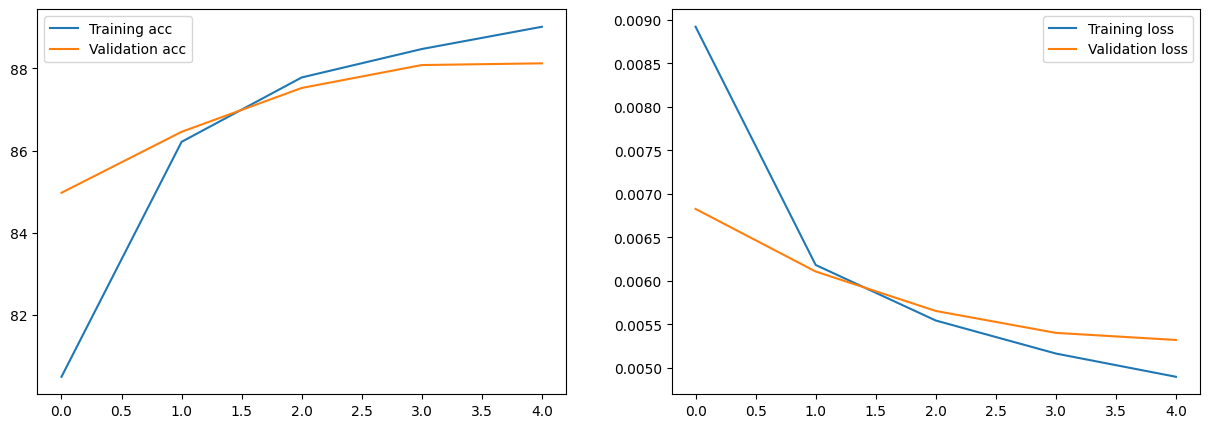

In [9]:
# 신경망 모델 net을 학습시키고 그 결과를 처리하는 과정을 보여줌

# train 함수를 호출하여 신경망 모델 net을 학습시키는데 학습 데이터 로더 train_loader, 검증 데이터 로더 valid_loader, 테스트 데이터 로더 test_loader를 사용하고, 총 5 에폭(epoch) 동안 학습을 수행하고 학습 과정에서 계산된 손실과 정확도 같은 통계 정보를 hist 변수에 저장
hist = train(net,train_loader, valid_loader, test_loader,epochs=5)

if hist is None: # train 함수에서 반환된 hist가 None인지 확인하는데 None은 학습 과정에서 오류가 발생했거나 예외가 처리되었음을 의미할 수 있음
    print("Training did not return any history.") # 만약 hist가 None이면, "학습이 어떠한 기록도 반환하지 않았습니다."라는 메시지를 출력하는데 이는 학습 과정에서 문제가 발생했음을 사용자에게 알리는 역할

else: # 만약 hist가 None이 아니라 유효한 데이터가 있으면
    plot_results(hist) # plot_results 함수를 호출하여 hist에 저장된 학습 결과(손실과 정확도 등)를 시각화하는데 이 함수는 일반적으로 matplotlib 같은 라이브러리를 사용하여 그래프를 그리고, 모델의 학습 진행 상황을 보여줌

마지막으로 잘못 분류된 이미지들을 분석하고 잘못 분류된 클래스에 대해서 시각화를 진행

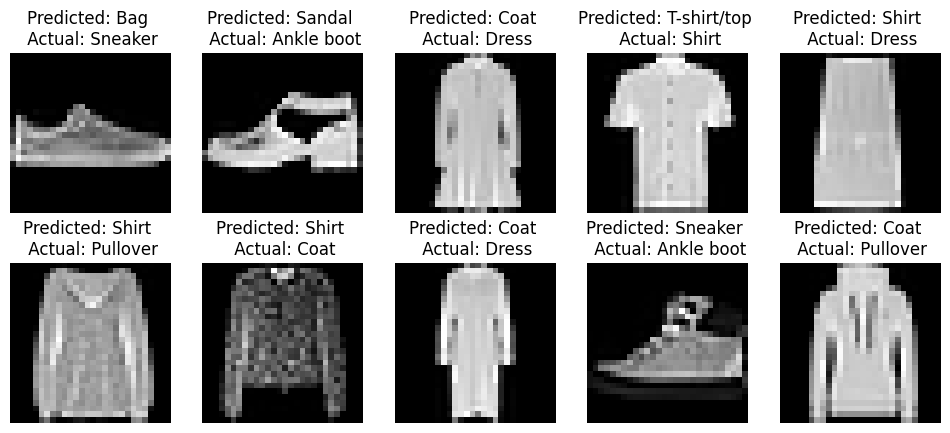

In [10]:
# 잘못 분류된 이미지들을 분석하고, 어떤 클래스가 모델에 의해 가장 잘못 분류되었는지를 식별하기

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot') # 패션 MNIST에 있는 클래스 분류

import torch
import matplotlib.pyplot as plt

def plot_misclassified(model, test_loader, classes, num_images=10):
    model.eval()                                                           # 평가 모드로 설정
    misclassified_images = []                                              # 잘못 분석한 이미지를 저장할 리스트

    with torch.no_grad():
        for data, target in test_loader:                        # for문으로 테스트 데이터 로더를 통해 각 배치의 데이터를 순회하도록 함.
            output = model(data)                                # 모델에 입력 데이터를 전달하고 예측 수행
            _, predicted = torch.max(output, 1)                 # 클래스 가져오기


            # 잘못 분류된 예측 찾기
            misclassified_idx = (predicted != target).nonzero()[:, 0]                       # 예측이 틀린 인덱스를 찾기
            for idx in misclassified_idx:                                                   # 각 클래스에 대해 잘못 분류된 예측 결과를 찾기 위해 대해 반복합니다.
                misclassified_images.append((data[idx], predicted[idx], target[idx]))       # 리스트 안에 잘못 분류한 것들을 추가

            if len(misclassified_images) >= num_images:         # 지정된 개수의 잘못 분류된 이미지를 찾으면 끝
                break

    # 찾은 잘못 분류된 이미지를 시각화
    plt.figure(figsize=(12, 5))         # 새로운 그림을 만들고 크기를 가로 12인치 세로 5인치로 지정 (배경을 말함)
    for i, (image, predicted, target) in enumerate(misclassified_images[:num_images]):      # for문을 통해서 잘못 분류된 이미지들을 처리
        plt.subplot(2, (num_images + 1) // 2, i + 1)                    # 그림을 여러 개로 나누어 그림 
        plt.axis('off')                                                 # 축 제거
        plt.imshow(image.squeeze().cpu().numpy(), cmap='gray')          # 이미지를 흑백으로
        plt.title(f'Predicted: {classes[predicted]} \n Actual: {classes[target]}')  # 제목 설정하는 부분으로 위에는 모델이 예측한 클래스를 아래에는 실제 클래스를 작성하도록 함.

    plt.show()          # 그림을 화면에 출력

# 잘못 분류된 이미지를 시각화
plot_misclassified(net, test_loader, classes, num_images=10)